In [1]:
import os
import itertools
import pandas as pd
from pandas import DataFrame 
import numpy as np
import sklearn
import sklearn.datasets as ds
import sklearn.model_selection as ms
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn import metrics 
from sklearn.model_selection import KFold 
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Pre-processing: 

In [2]:
data_dir = ''
data_file = "NewCovid19_Pre-processed_data.csv"

df = pd.read_csv(os.path.join(data_dir, data_file))
df.drop(df.columns[df.columns.str.contains('Unnamed: 0',case = False)],axis = 1, inplace = True)
# df
df = df.dropna()
df = df.reset_index(drop=True)
df

,Country/Region,Confirmed,Deaths,Recovered,Active,AvgTemp
0,US,4290259,148011,1325804,2816444,12.1
1,Brazil,2442375,87618,1846641,508116,23.4
2,India,1480073,33408,951166,495499,26.9
3,Russia,816680,13334,602249,201097,-11.5
4,South Africa,452529,7067,274925,170537,18.3
...,...,...,...,...,...,...
158,Belize,48,2,26,20,27.3
159,Fiji,27,0,18,9,26.6
160,Laos,20,0,19,1,28.5
161,Dominica,18,0,18,0,25.8


In [3]:
X = df[['Confirmed', 'Deaths', 'Recovered','Active']]
y = df['AvgTemp']

<AxesSubplot:xlabel='AvgTemp', ylabel='Confirmed'>

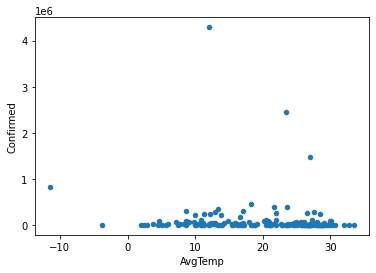

In [4]:
df.plot.scatter(x = 'AvgTemp', y = 'Confirmed')

Correlation Graph: 

/Users/chihumeya/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


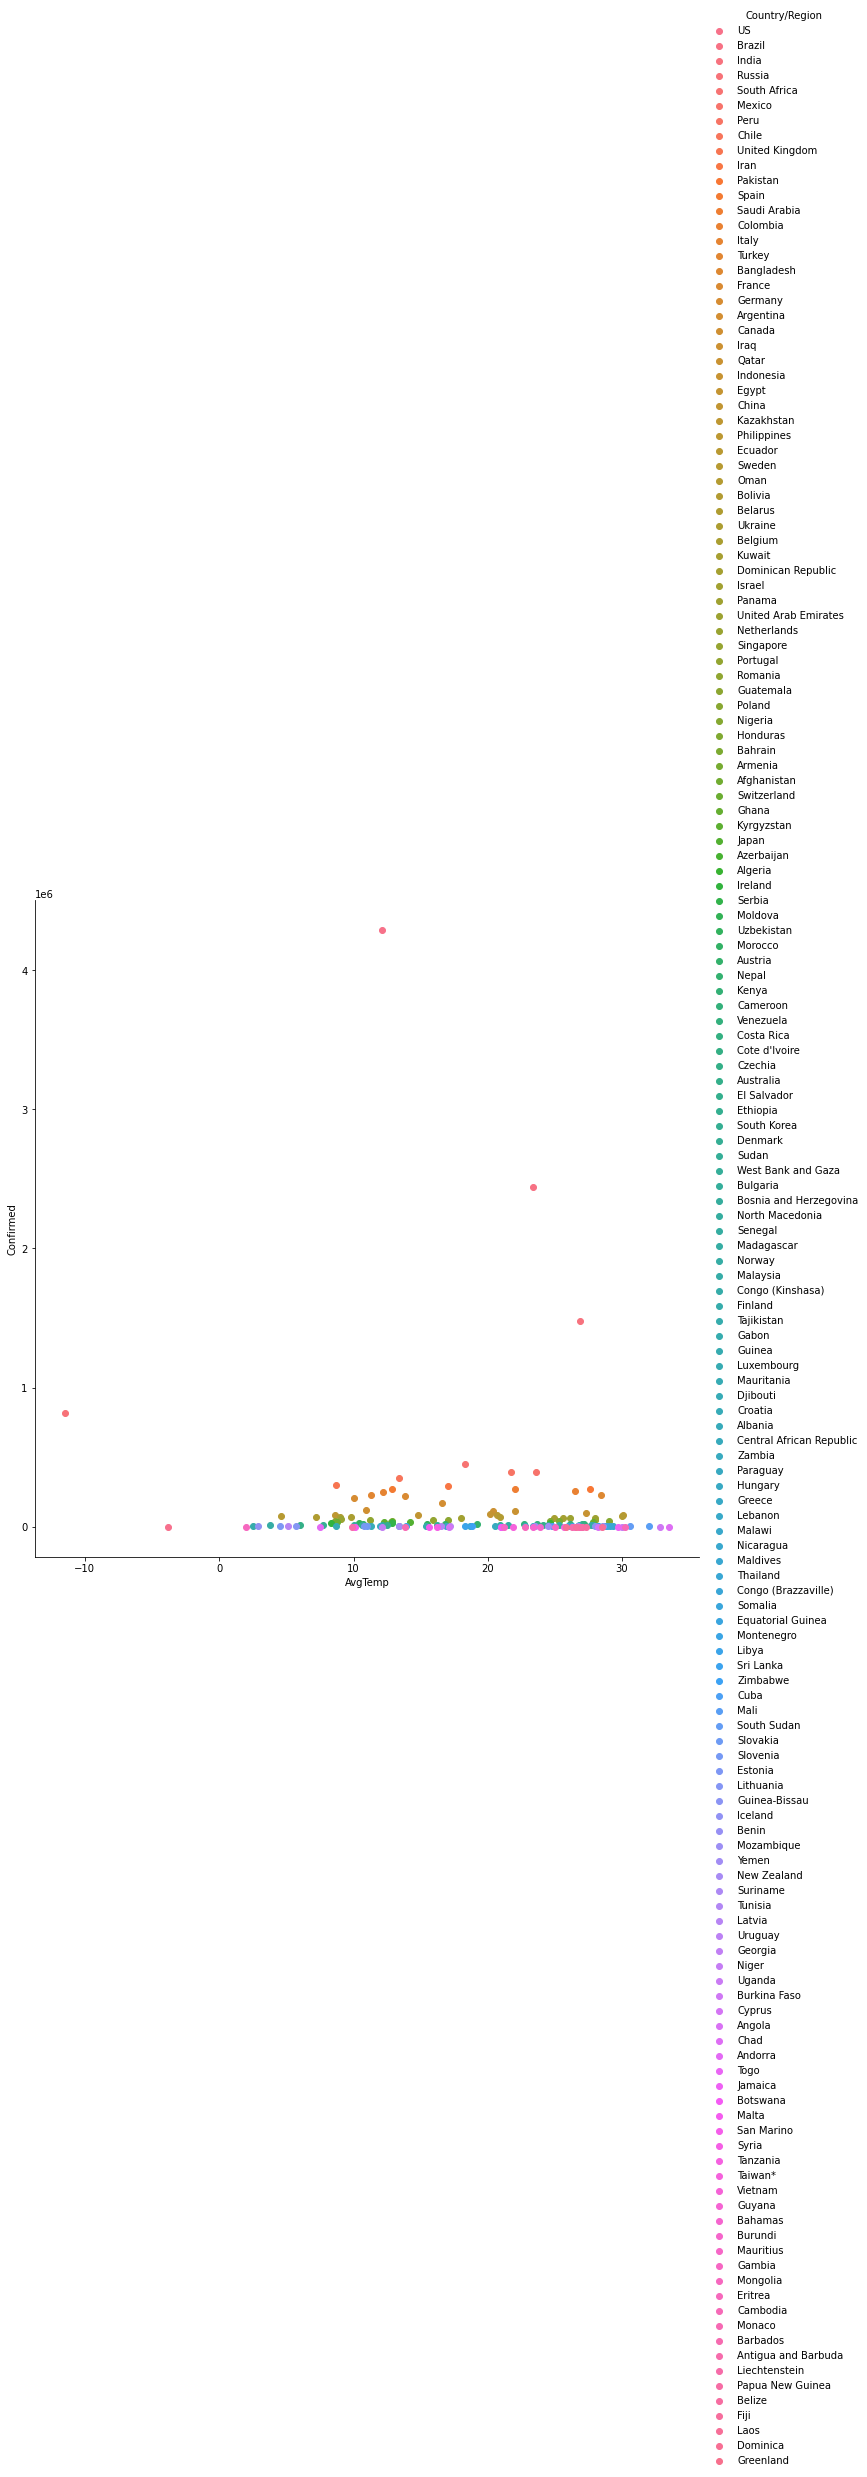

In [5]:
sns.FacetGrid(df, hue="Country/Region", size=10) \
   .map(plt.scatter, "AvgTemp", "Confirmed") \
   .add_legend()

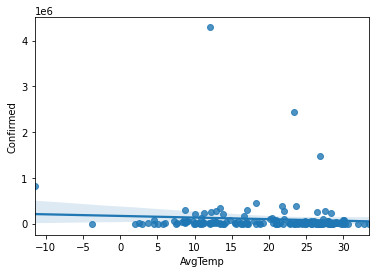

In [6]:
#Regression plot 
import seaborn as sb
from matplotlib import pyplot as plt
# df = sb.load_dataset('tips') 
sb.regplot(x = "AvgTemp", y = "Confirmed", data = df)
plt.show()

For a series like AvgTemp which is continuous and fractional series, a regression like models= should be used.


Linear Regression Algorithm: 

In [7]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import scipy.stats

x = df[['Confirmed', 'Deaths', 'Recovered','Active']]
y = df['AvgTemp']

# sckit-learn Linear Regression implementation

# Model initialization
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(x, y)
# Predict
y_predicted = regression_model.predict(x)
print("Prediction values: ", y_predicted)
# model evaluation
rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)
# values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)


Prediction values:  [11.71615616 16.53556414 20.13900775 20.65043845 20.00236001 14.63542729
 18.21642768 19.5135213  13.57560273 18.29431764 19.65544148 16.2597638
 20.04803759 18.9895144  15.3282535  19.50751243 19.72921512 15.74394393
 18.92029944 19.46626241 18.36123975 19.13382512 19.79260333 19.01293764
 18.97625026 19.04229181 19.57253888 19.3201366  18.8216227  18.72867365
 19.58522974 19.18281971 19.54567205 19.34559323 18.13929949 19.54250915
 19.40401075 19.48480226 19.37192875 19.53767744 18.59645446 19.54898625
 19.28710835 19.18860001 19.26287013 19.27082732 19.35449031 19.28281442
 19.48577573 19.38161225 19.29637634 19.20113162 19.45518507 19.27679516
 19.31589587 19.39850165 19.27840356 19.19564076 19.32222613 19.32025545
 19.39644441 19.37679713 19.32242506 19.40437236 19.35762021 19.35264726
 19.37626172 19.36897984 19.38328093 19.34536604 19.37030421 19.33239381
 19.35425204 19.35531588 19.30877128 19.27517569 19.36068027 19.32567924
 19.33171599 19.30760866 19.3469

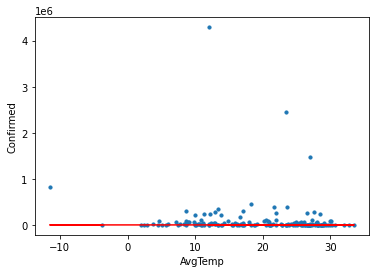

In [8]:
# Regression Plot
plt.scatter(df['AvgTemp'], df['Confirmed'] , s=10)
plt.xlabel('AvgTemp')
plt.ylabel('Confirmed')
# predicted values
plt.plot(df['AvgTemp'], y_predicted, color='r')
plt.show()

Using Decision Tree Regressor: 

In [9]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import scipy.stats

x = df[['Confirmed', 'Deaths', 'Recovered','Active']]
y = df['AvgTemp']

# sckit-learn Linear Regression implementation

# Model initialization
regression_model = DecisionTreeRegressor(random_state = 0)
# Fit the data(train the model)
regression_model.fit(x, y)
# Predict
y_predicted = regression_model.predict(x)
print("Prediction values: ", y_predicted)
# model evaluation
rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)
# values

print('Root mean squared error: ', rmse)
print('R2 score: ', r2)


Prediction values:  [ 12.1  23.4  26.9 -11.5  18.3  23.6  21.7  13.4   8.7  17.   27.6  12.9
  22.   26.5  12.2  11.3  28.4  13.8  10.   16.6  10.9  20.4  22.   27.3
  20.2  14.8   8.6  30.1  20.7   4.6  30.   20.9   7.2   9.    9.8  24.9
  25.6  18.   28.   26.1   9.1  28.   15.9  11.2  17.    8.6  29.   24.6
  25.3  12.9  12.8   8.8  27.8  12.3  14.2  12.9  24.6   8.3  12.9  10.4
  15.5  16.8  10.7  19.2  27.2  26.1  22.7  23.7  27.    6.   24.1  24.5
  20.9  12.5   7.7  27.8  16.2  10.6  10.   12.1  21.5  25.3   3.8  27.7
  26.8   2.5  15.4  26.7  28.6   8.7  20.9  28.7  11.3  13.4  28.2  20.5
  22.8  12.   16.9  18.7  23.4  29.3  28.9  29.1  26.   28.8  26.3  13.9
  18.3  28.2  18.8  24.8  32.   30.6  11.   10.8   4.5   5.7  28.    2.9
  28.6  23.5  24.5  13.4  26.7  16.5   5.1  17.2  12.1  30.   21.   32.8
  17.1  28.2  33.5   7.5  29.7  26.9  21.   15.6  10.1  16.2  26.5  21.9
  25.7  27.   23.4  23.9  21.2  25.    2.   22.8  30.2  13.8  26.8  26.3
   9.9  27.   27.3  26.6  28.5 

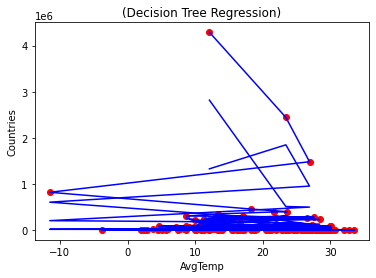

In [10]:
plt.scatter( y,x.iloc[:,0], color = 'red')
  
# plot predicted data
plt.plot( y_predicted,x, color = 'blue') 
  
# specify title
plt.title('(Decision Tree Regression)') 
  
# specify X axis label
plt.xlabel('AvgTemp')
  
# specify Y axis label
plt.ylabel('Countries')
  
# show the plot
plt.show()